# Generating datasets

In this section, we cover generation of data sets.

In [1]:
using CairoMakie
using AlgebraOfGraphics
using Random
using Distributions
using Chain
using DataFrames
using StatsFuns

Precompiling AlgebraOfGraphics...
   1431.7 ms  ✓ GLM
  20792.7 ms  ✓ AlgebraOfGraphics
  2 dependencies successfully precompiled in 23 seconds. 320 already precompiled.


## Classical linear model

Parameters.

In [2]:
n = 100
β₀ = 1
β₁ = 2
σ² = 10

10

Simulation.

In [3]:
x = rand(Normal(10, 3), n)
y = β₀ .+ β₁* x + rand(Normal(0, sqrt(σ²)), n)

100-element Vector{Float64}:
 26.41549425378133
 27.107336670278304
 30.18450044165117
  9.051381921065381
 23.512300432801847
 23.467919907027635
 32.62782173267533
 23.184209573356476
 39.486308483845704
 30.71242142153855
  ⋮
 28.09080167204552
  7.899151802996264
 21.450399347752445
 16.723063750524354
 16.768508496301408
 14.608426640451734
 19.923312955270184
 17.017973045324112
 15.778435376328833

Visualization.

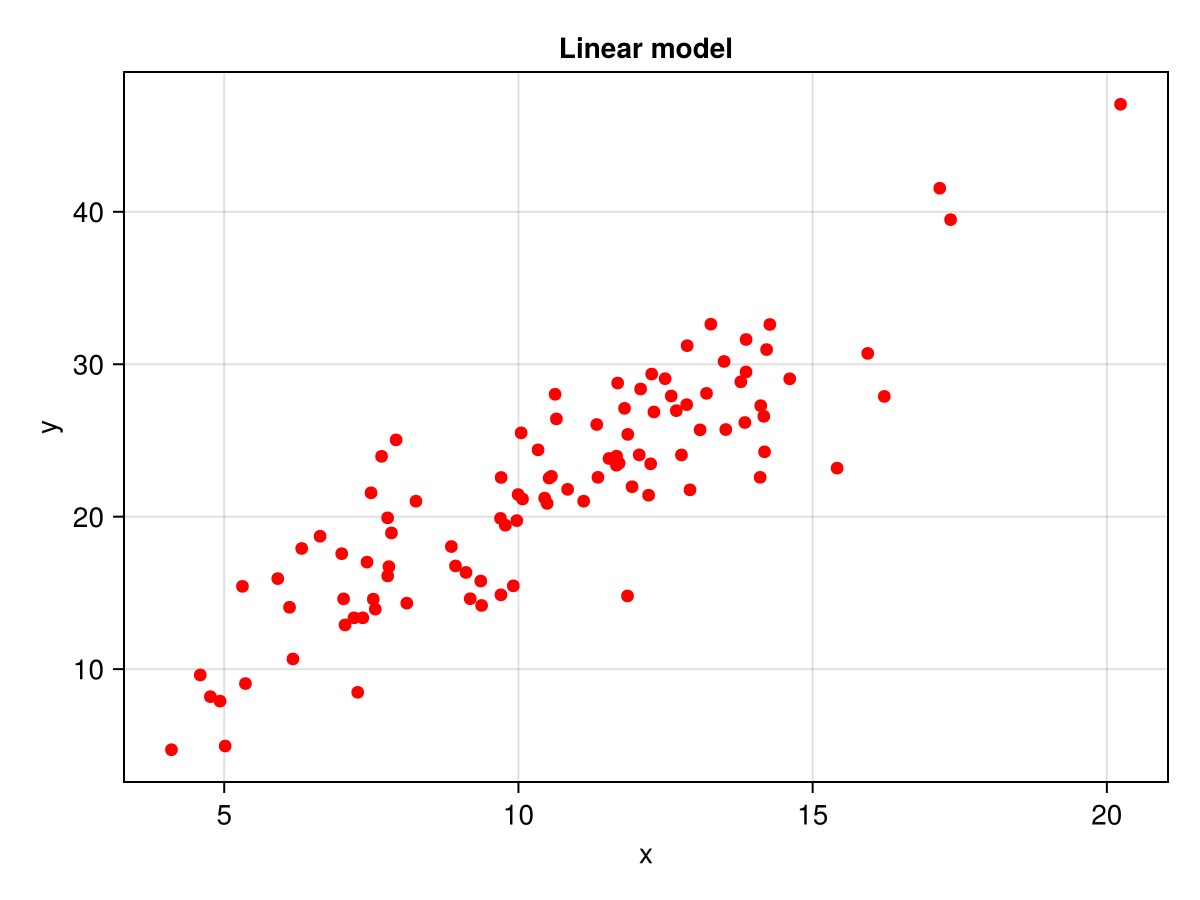

In [4]:
fig = scatter(x, y, color = :red,
    axis = (title = "Linear model", xlabel = "x", ylabel = "y")
)

## Linear model (GLM)

Parameters.

In [5]:
n = 100
β₀ = 10
β₁ = 3
β₂ = 2
σ² = 10

10

Simulation.

In [6]:
x1 = rand(Normal(), n)
x2 = rand(Exponential(), n)
μ = β₀ .+ β₁ * x1 + β₂ * x2
y = rand.(Normal.(μ, sqrt(σ²)))
df = DataFrame(x1 = x1, x2 = x2, μ = μ, y = y)

100×4 DataFrame
 Row │ x1          x2        μ         y        
     │ Float64     Float64   Float64   Float64  
─────┼──────────────────────────────────────────
   1 │  0.832724   0.710965  13.9201   13.9916
   2 │  0.228678   0.601733  11.8895   13.8375
   3 │ -0.231592   2.03785   13.3809   21.0898
   4 │ -0.561093   0.597424   9.51157  10.9046
   5 │ -2.07994    3.17341   10.107     7.61299
   6 │ -0.251577   0.476238  10.1977   10.9835
   7 │ -0.117317   0.274924  10.1979    9.07258
   8 │  0.893223   1.84851   16.3767   16.8443
  ⋮  │     ⋮          ⋮         ⋮         ⋮
  94 │ -0.844903   4.06846   15.6022   18.4219
  95 │  0.975032   1.0532    15.0315   13.1165
  96 │ -0.140908   1.83961   13.2565   11.0574
  97 │  1.49099    1.40139   17.2758   16.4034
  98 │ -0.0536574  0.102832  10.0447   13.4006
  99 │ -1.04304    1.45743    9.78573   7.67167
 100 │ -1.73614    0.572732   5.93705   6.65508
                                 85 rows omitted

Visualization.

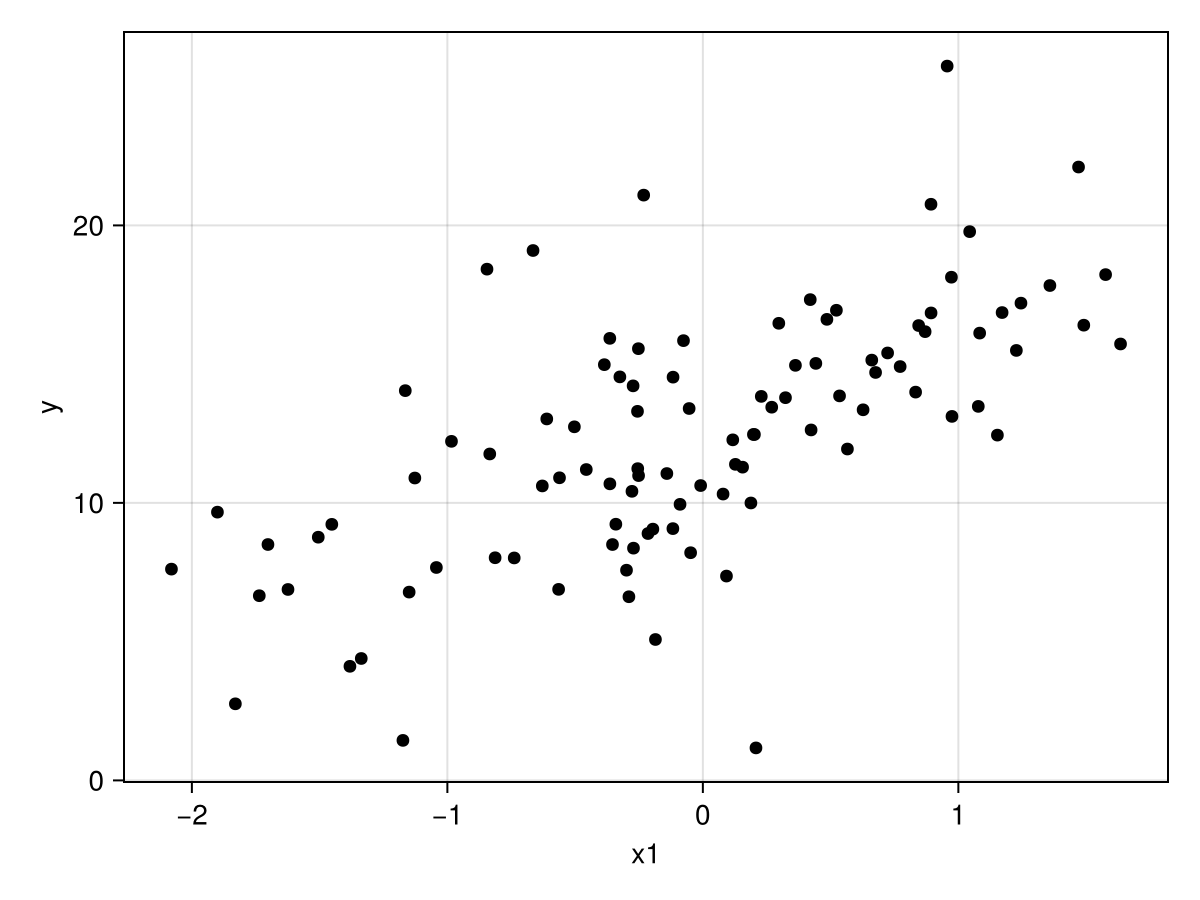

In [7]:
g = data(df) * mapping(:x1, :y)
fig = draw(g)

Let's plot more variables.

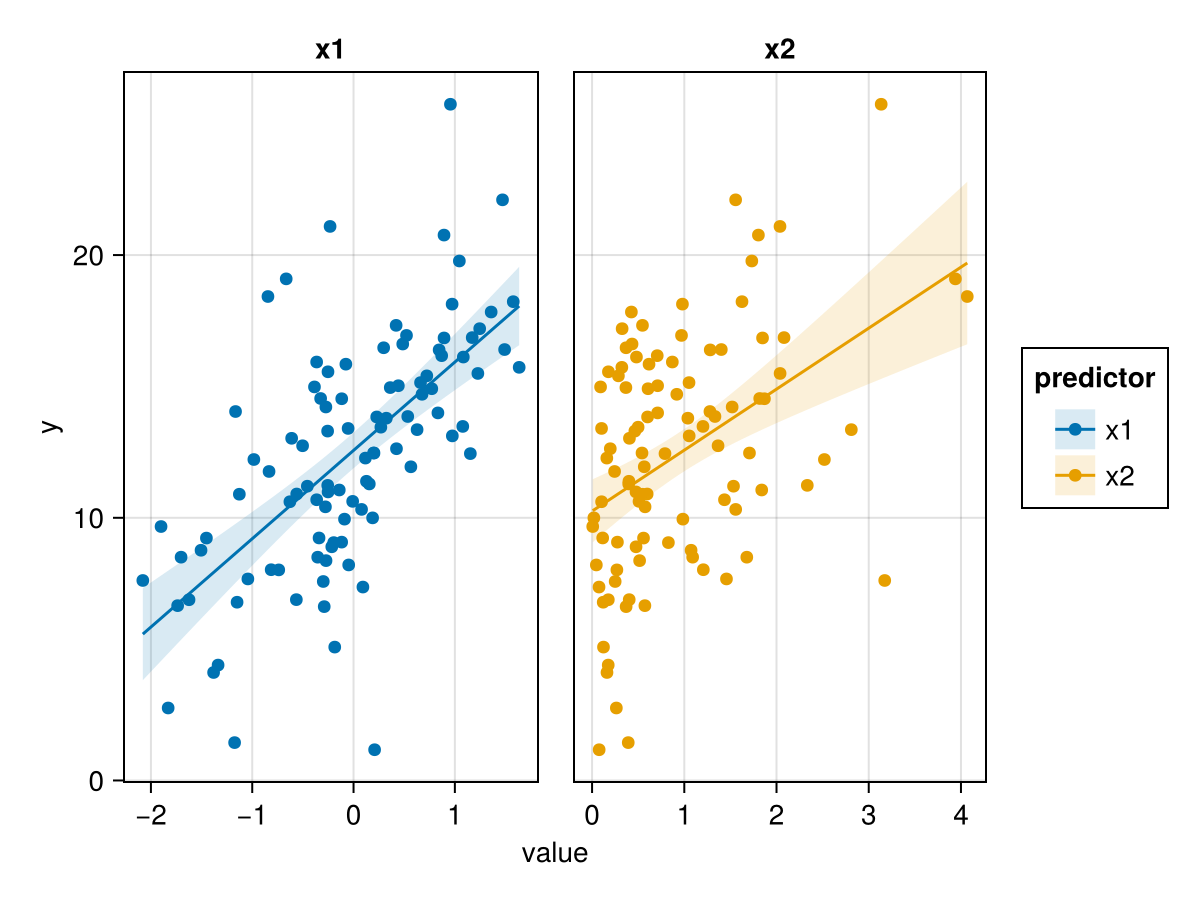

In [8]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model

Define parameters.

In [9]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [10]:
x = rand(Normal(), n)
p = logistic.(β₀ .+ β₁ * x)
y = rand.(Bernoulli.(p))
df = DataFrame(x = x, p = p, y = y)

100×3 DataFrame
 Row │ x           p         y     
     │ Float64     Float64   Bool  
─────┼─────────────────────────────
   1 │  1.64823    0.997387   true
   2 │  1.08335    0.985937   true
   3 │  2.09272    0.99931    true
   4 │ -1.07595    0.097276  false
   5 │  0.400262   0.90032    true
   6 │  0.404637   0.901492  false
   7 │ -0.441802   0.419359  false
   8 │  0.546634   0.933386   true
  ⋮  │     ⋮          ⋮        ⋮
  94 │  0.419036   0.905262   true
  95 │  1.32557    0.99315    true
  96 │ -0.773488   0.210741  false
  97 │  0.591476   0.941278   true
  98 │  1.59329    0.99692    true
  99 │  2.1262     0.999376   true
 100 │  1.10159    0.986676   true
                    85 rows omitted

Visualize.

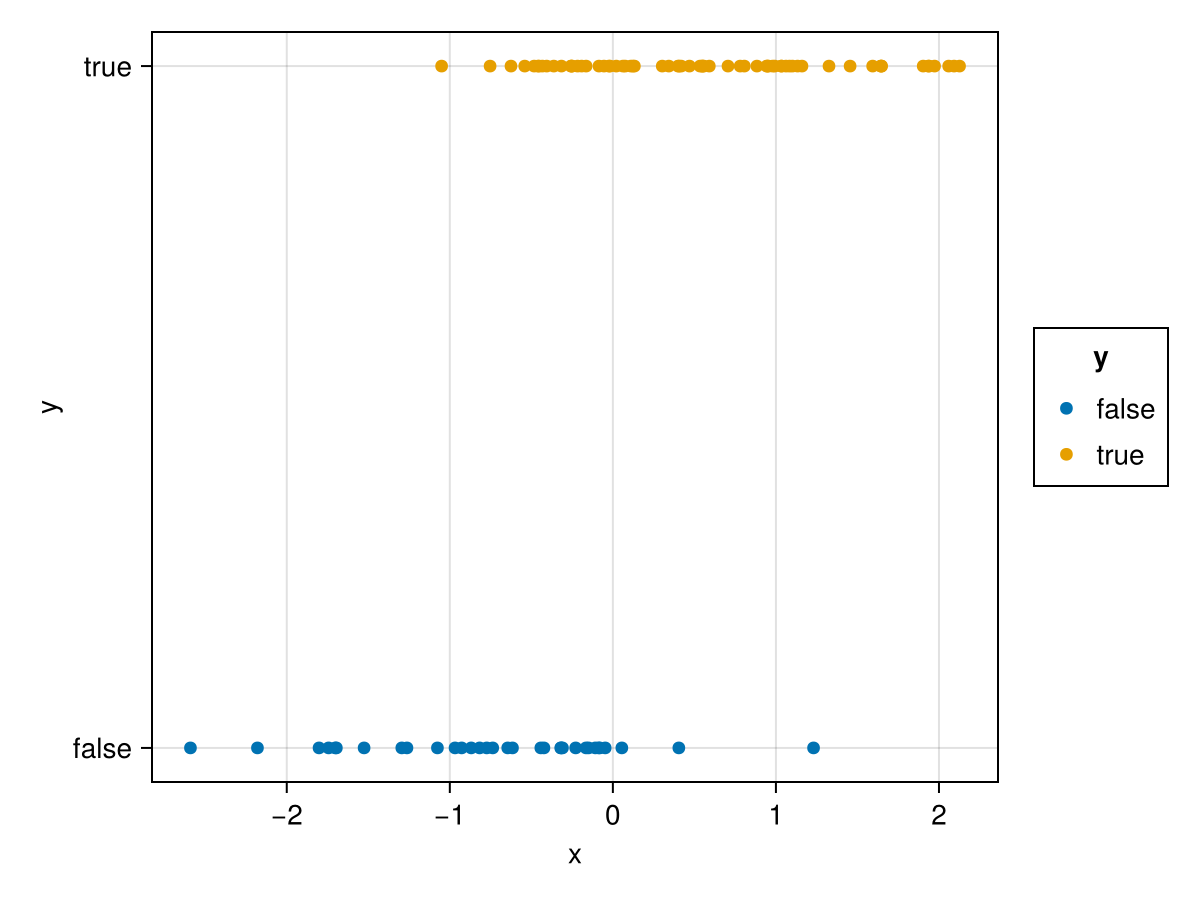

In [11]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model

Define parameters.

In [12]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [13]:
x = rand(Normal(), n)
lambda = exp.(β₀ .+ β₁ * x)
y = rand.(Poisson.(lambda))
df = DataFrame(x = x, lambda = lambda, y = y)

100×3 DataFrame
 Row │ x           lambda    y     
     │ Float64     Float64   Int64 
─────┼─────────────────────────────
   1 │  0.349909   1.31647       1
   2 │  0.341358   1.31085       1
   3 │ -0.713979   0.773376      1
   4 │  1.21746    2.03141       3
   5 │ -1.94786    0.417309      0
   6 │ -1.13777    0.625699      0
   7 │ -0.388321   0.910137      2
   8 │ -1.27883    0.583089      1
  ⋮  │     ⋮          ⋮        ⋮
  94 │ -0.405076   0.902544      0
  95 │ -0.644472   0.800727      0
  96 │ -0.148059   1.02631       2
  97 │  1.00888    1.83023       0
  98 │  1.3802     2.20361       1
  99 │ -0.241001   0.979708      1
 100 │ -1.90116    0.427168      0
                    85 rows omitted

Visualize.

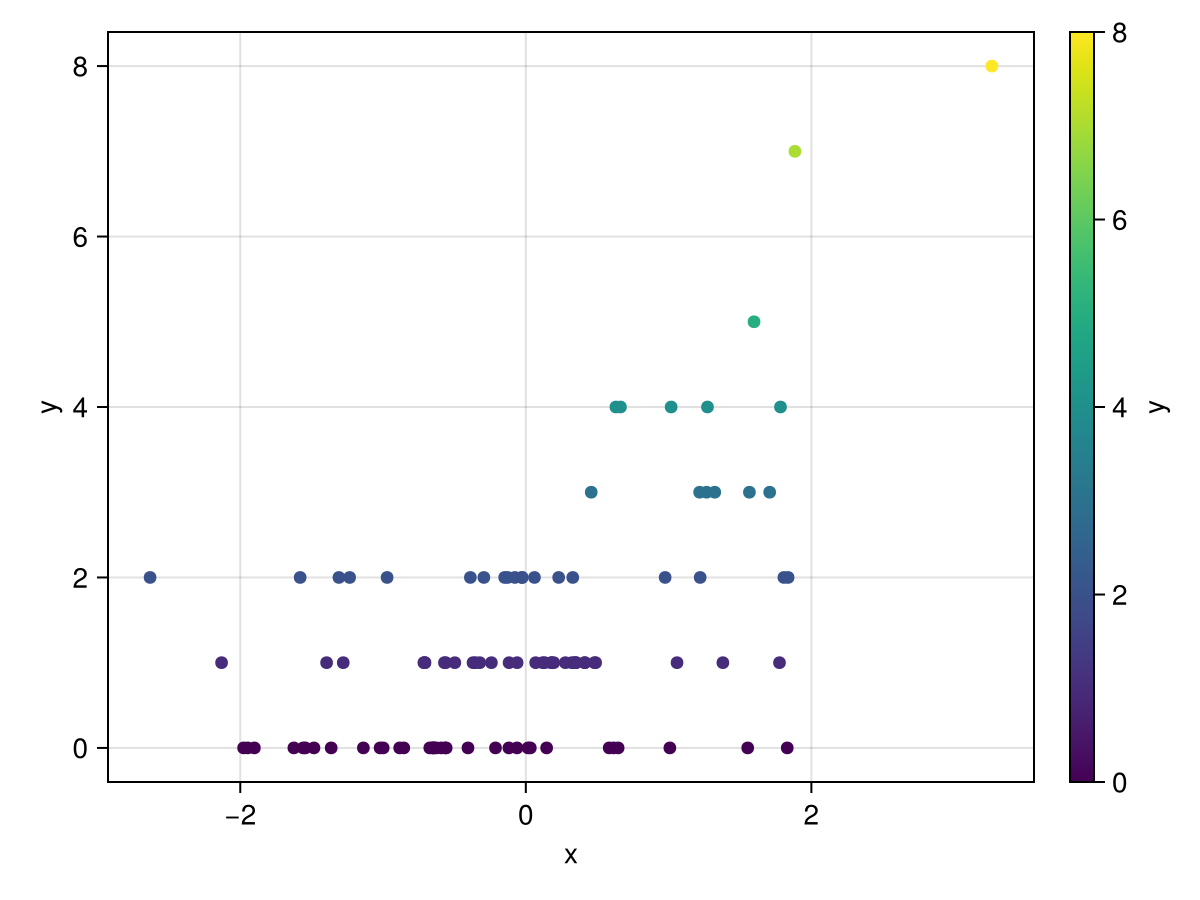

In [14]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Linear model with dataframes (GLM)

Define parameters.

In [15]:
n = 100
β₀ = 10
β₁ = 3
σ² = 10

10

Simulate.

In [16]:
generate_y(x1, x2) = β₀ .+ β₁ * x1 + 2 * x2
df = @chain begin
    DataFrame(x1 = rand(Normal(), n), x2 = rand(Exponential(), n))
    transform!([:x1, :x2] => generate_y => :μ)
    transform!(:μ => (x -> rand.(Normal.(x, sqrt(σ²)))) => :y)
end

100×4 DataFrame
 Row │ x1          x2          μ         y        
     │ Float64     Float64     Float64   Float64  
─────┼────────────────────────────────────────────
   1 │  0.132206   1.48594     13.3685   18.5875
   2 │  0.632197   0.976057    13.8487   20.4222
   3 │  2.43212    0.0749789   17.4463    8.03134
   4 │  0.494628   0.538714    12.5613   14.9646
   5 │ -1.06372    0.308035     7.42492   3.64143
   6 │  0.934517   0.201162    13.2059   10.8838
   7 │ -1.72862    1.30848      7.43108   8.80139
   8 │ -0.286061   0.569215    10.2802    6.80321
  ⋮  │     ⋮           ⋮          ⋮         ⋮
  94 │  2.04469    0.76218     17.6584   22.8226
  95 │  3.57767    0.197635    21.1283   22.7833
  96 │ -0.492855   0.386193     9.29382  10.7895
  97 │ -1.44716    0.0951875    5.84889   5.05589
  98 │ -0.210434   0.272625     9.91395  13.8639
  99 │ -0.602948   0.0110742    8.2133   12.8311
 100 │ -0.367335   1.0368      10.9716   12.8061
                                   85 rows omitted

Visualize.

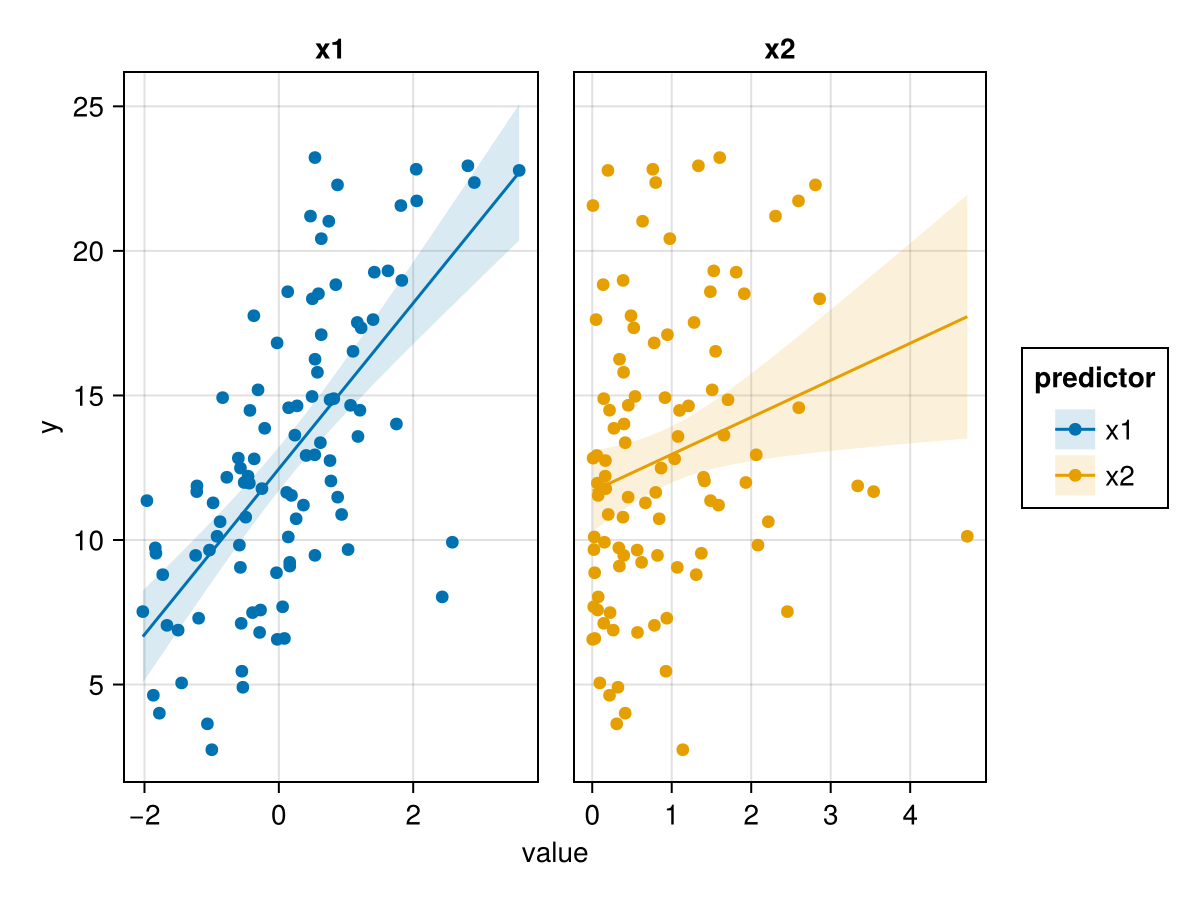

In [17]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model with dataframes

Define parameters.

In [18]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [19]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> logistic.(β₀ .+ β₁ * x)) => :p)
    transform!(:p => (x -> rand.(Bernoulli.(x))) => :y)
end

100×3 DataFrame
 Row │ x          p           y     
     │ Float64    Float64     Bool  
─────┼──────────────────────────────
   1 │  0.550811  0.934161     true
   2 │ -0.587493  0.318109    false
   3 │ -1.12572   0.0849314   false
   4 │  0.835562  0.970877     true
   5 │ -0.398742  0.4511      false
   6 │ -1.37642   0.0419159   false
   7 │  0.781882  0.965962     true
   8 │  1.12182   0.987451     true
  ⋮  │     ⋮          ⋮         ⋮
  94 │ -1.55001   0.0253319   false
  95 │ -1.19034   0.0710273   false
  96 │  0.673685  0.953516     true
  97 │ -1.32047   0.0491998   false
  98 │ -0.410315  0.442519     true
  99 │  1.39203   0.994382     true
 100 │ -1.42242   0.0367116   false
                     85 rows omitted

Visualize.

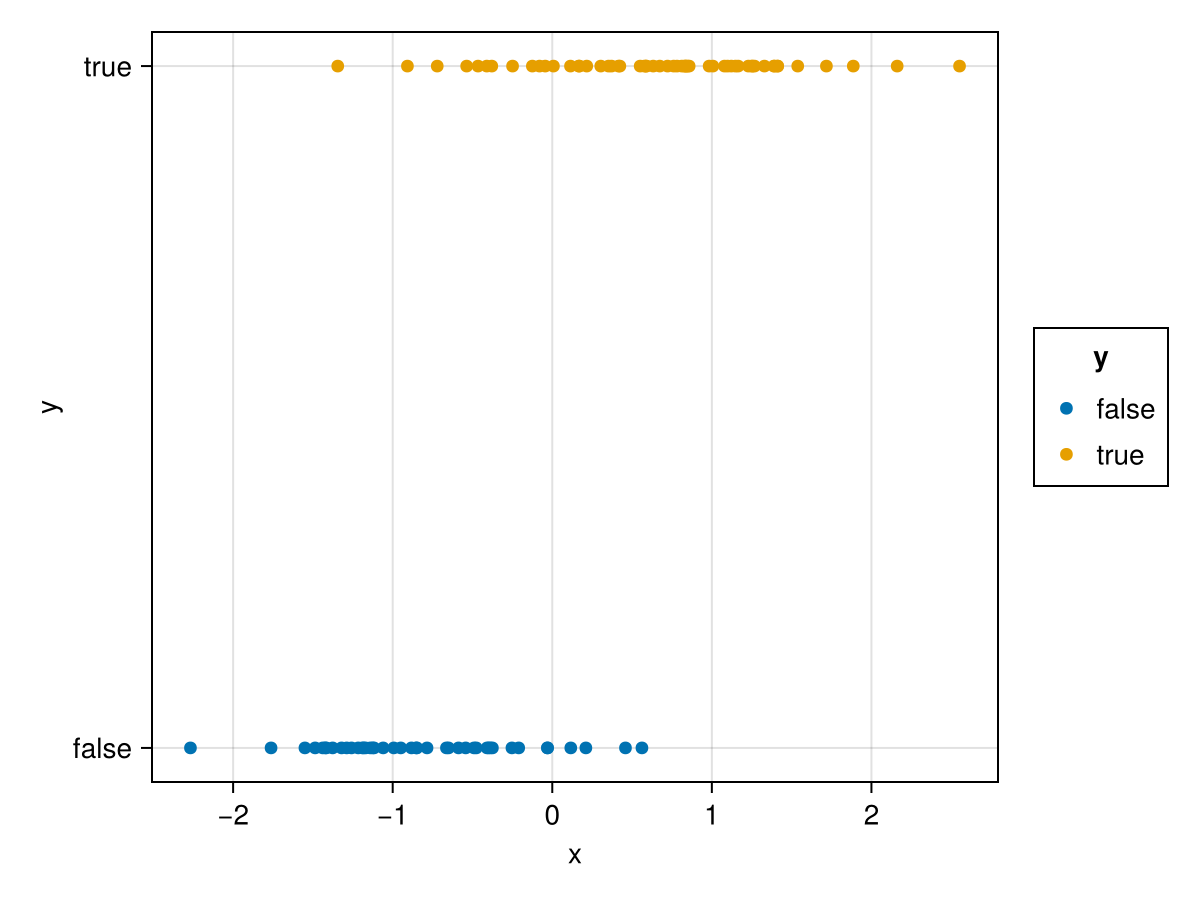

In [20]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model with dataframes

Define parameters.

In [21]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [22]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> exp.(0.1 .+ 0.5 * x)) => :λ)
    transform!(:λ => (x -> rand.(Poisson.(x))) => :y)
end

100×3 DataFrame
 Row │ x           λ         y     
     │ Float64     Float64   Int64 
─────┼─────────────────────────────
   1 │  0.157933   1.19598       1
   2 │ -1.41556    0.544557      1
   3 │ -2.01175    0.404188      0
   4 │ -0.0717847  1.06621       0
   5 │ -1.17875    0.613009      0
   6 │  0.0840003  1.15258       2
   7 │ -0.693823   0.78121       1
   8 │  1.30133    2.11841       0
  ⋮  │     ⋮          ⋮        ⋮
  94 │ -0.355789   0.925062      2
  95 │  0.0803465  1.15047       1
  96 │  0.797193   1.64641       0
  97 │  1.59982    2.45938       1
  98 │  0.800761   1.64935       2
  99 │ -0.65866    0.795066      3
 100 │  0.631195   1.51528       1
                    85 rows omitted

Visualize.

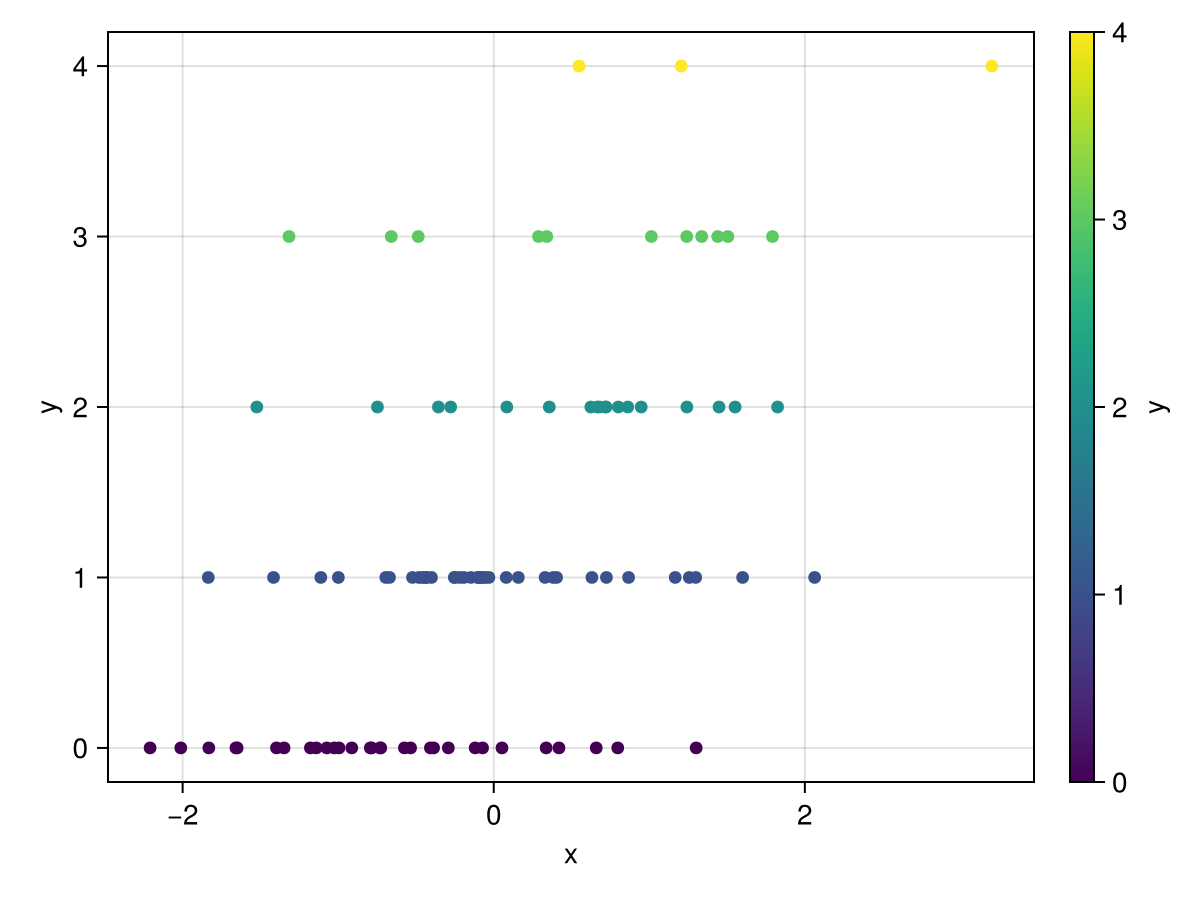

In [23]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*